<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/VeriOnisleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu satırlar gerekli kütüphaneleri içe aktarır.


In [1]:
import os
import random
from PIL import Image
import numpy as np


In [2]:
klasor_yollari = [
    '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial',
    '/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal',
    '/content/drive/MyDrive/Multiple Sclerosis/MS-Axial',
    '/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'
]


In [3]:


veri_setleri = {}

for klasor_yolu in klasor_yollari:
    dosyalar = [dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith('.png')]
    secilen_dosyalar = random.sample(dosyalar, 500)
    veri_setleri[klasor_yolu] = [np.array(Image.open(os.path.join(klasor_yolu, dosya))) for dosya in secilen_dosyalar]

In [4]:
for anahtar in veri_setleri.keys():
    print(anahtar)

/content/drive/MyDrive/Multiple Sclerosis/Control-Axial
/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal
/content/drive/MyDrive/Multiple Sclerosis/MS-Axial
/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal


In [5]:
for klasor in veri_setleri:
    for i, goruntu in enumerate(veri_setleri[klasor]):
        # Normalizasyon
        goruntu = goruntu / 255.0
        veri_setleri[klasor][i] = goruntu

In [8]:
from skimage.transform import resize

for klasor in veri_setleri:
    for i, goruntu in enumerate(veri_setleri[klasor]):
        # Görüntüyü yeniden boyutlandırma
        goruntu = resize(goruntu, (128, 128))
        veri_setleri[klasor][i] = goruntu

In [11]:
def kontrol_et_ve_yukle(dosya_yolu):
    try:
        goruntu = Image.open(dosya_yolu)
        goruntu.verify()  # Görüntü dosyasının bozuk olup olmadığını kontrol eder.
        return np.array(goruntu)
    except (IOError, SyntaxError):
        print(f"Bozuk dosya: {dosya_yolu}")
        return None

In [12]:
from scipy.ndimage import gaussian_filter

def gurultu_azalt(goruntu):
    return gaussian_filter(goruntu, sigma=1)

In [13]:
def segmentasyon_yap(goruntu):
    eşik_değeri = 127
    _, segmentasyon = cv2.threshold(goruntu, eşik_değeri, 255, cv2.THRESH_BINARY)
    return segmentasyon

In [9]:
for klasor in veri_setleri:
    print(f"{klasor}: {len(veri_setleri[klasor])} görüntü")

/content/drive/MyDrive/Multiple Sclerosis/Control-Axial: 500 görüntü
/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal: 500 görüntü
/content/drive/MyDrive/Multiple Sclerosis/MS-Axial: 500 görüntü
/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal: 500 görüntü


In [14]:
tum_goruntuler = []
tum_etiketler = []

for klasor in veri_setleri:
    # Klasör adını etiket olarak kullanıyoruz
    etiket = klasor.split('/')[-1]
    for goruntu in veri_setleri[klasor]:
        tum_goruntuler.append(goruntu)
        tum_etiketler.append(etiket)


In [15]:
from sklearn.model_selection import train_test_split

# İlk olarak, verileri eğitim ve kalan (doğrulama + test) seti olarak ayırıyoruz
X_train, X_temp, y_train, y_temp = train_test_split(tum_goruntuler, tum_etiketler, test_size=0.4, random_state=42)

# Kalan verileri doğrulama ve test setlerine ayırıyoruz
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

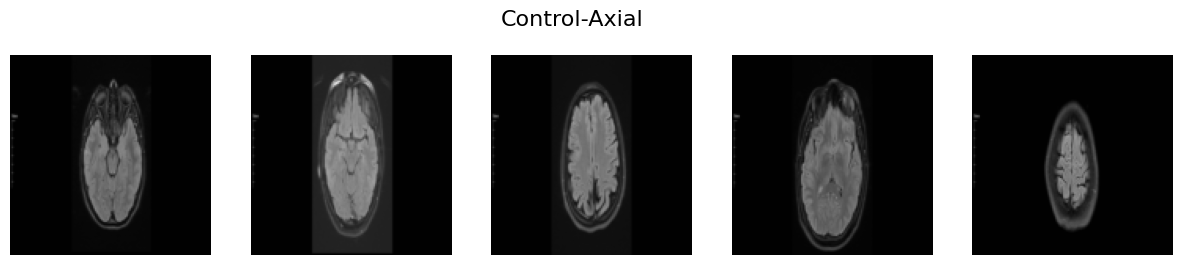

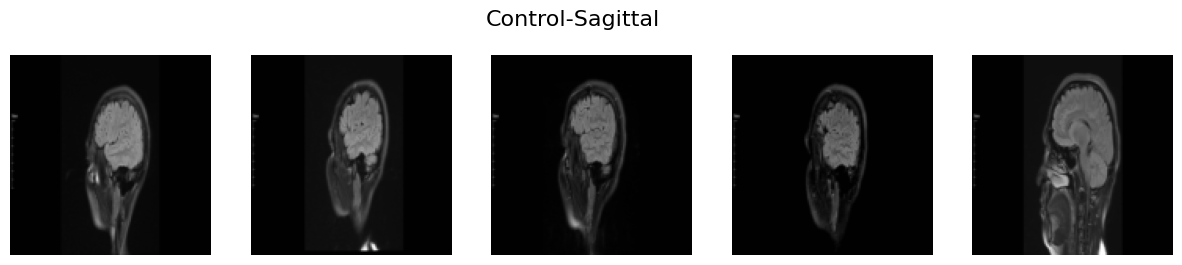

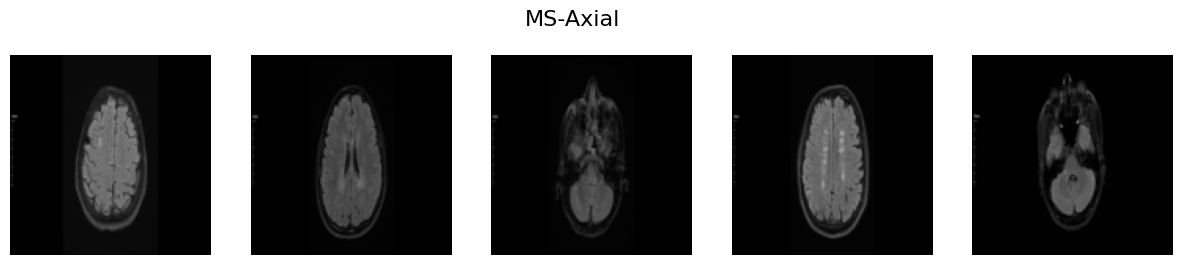

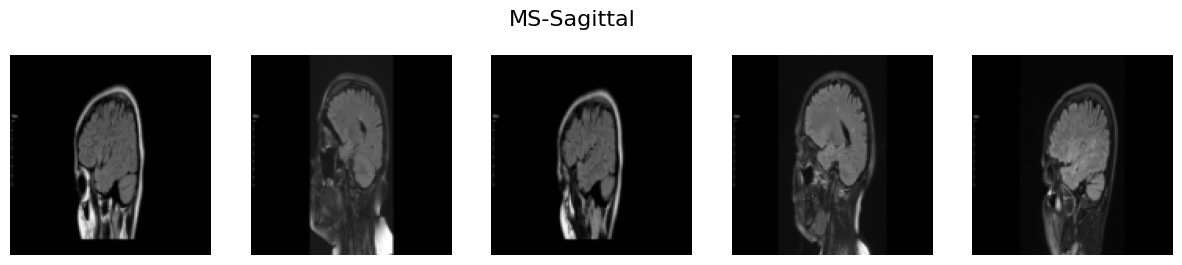

In [16]:
import matplotlib.pyplot as plt
import random

# Her bir klasör için beş görüntüyü görselleştirme
num_samples_per_class = 5  # Her klasörden görselleştirilecek örnek sayısı

# Control-Axial için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/Control-Axial'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('Control-Axial', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# Control-Sagittal için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('Control-Sagittal', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# MS-Axial için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/MS-Axial'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('MS-Axial', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# MS-Sagittal için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('MS-Sagittal', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

In [17]:
print("Eğitim seti boyutu:", len(X_train))
print("Doğrulama seti boyutu:", len(X_val))
print("Test seti boyutu:", len(X_test))

Eğitim seti boyutu: 1200
Doğrulama seti boyutu: 400
Test seti boyutu: 400


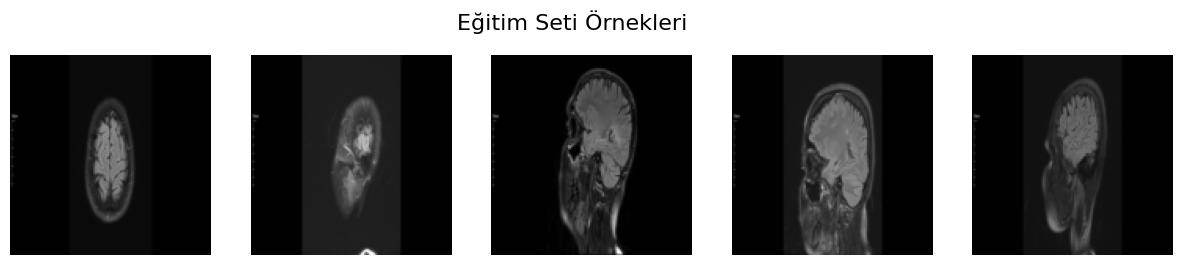

In [18]:
import matplotlib.pyplot as plt
import random

def goruntuleri_goster(goruntuler, baslik, num_samples=5):
    secilen_ornekler = random.sample(goruntuler, num_samples)
    plt.figure(figsize=(15, 3))
    plt.suptitle(baslik, fontsize=16)
    for i, ornek in enumerate(secilen_ornekler):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(ornek, cmap='gray')
        plt.axis('off')
    plt.show()

# Eğitim setinden örnekleri görselleştirme
goruntuleri_goster(X_train, 'Eğitim Seti Örnekleri')

# Doğrulama ve test setlerinden de benzer şekilde örnekleri görselleştirebilirsiniz.
